In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

test_dir="./case_data/BikeRentalDaily_test.csv"
train_dir="./case_data/clean_training_data.csv"


test_contents = pd.read_csv(test_dir, sep=';')


train_contents = pd.read_csv(train_dir, sep=';')

print(train_contents.head())
# print(test_contents.head())


   instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0      154     2.0   0     6        0        5           1           1   
1      685     4.0   1    11        0        4           1           2   
2      368     1.0   1     1        0        2           1           1   
3      472     2.0   1     4        1        1           0           1   
4      442     1.0   1     3        0       -1           0           2   

      temp     atemp        hum  windspeed  leaflets  price reduction   cnt  
0  24.8000  0.587133   53.12505   0.253121       991                0  5312  
1  12.8667  0.324492   93.06255   0.152987       601                0  5445  
2   6.0000  0.126275   66.18750   0.365671       549                0  2236  
3  26.5667  0.614925   84.25005   0.284829       740                0  6370  
4  20.5667  0.505046  113.37495   0.110704       773                1  7836  


In [42]:
feature_cols = ["temp", "atemp", "instant"]

X = train_contents.loc[:, feature_cols]
y = train_contents.cnt


linreg = LinearRegression()

linreg.fit(X,y)

X_test = test_contents.loc[:, feature_cols]
y_test = test_contents.registered

pred = linreg.predict(X_test)

linreg.score(X_test, y_test)

0.07632651757191611

In [43]:
feature_cols = ["temp", "atemp", "instant"]

X = train_contents.loc[:, feature_cols]
y = train_contents.cnt
pipe = make_pipeline(StandardScaler(), HuberRegressor())

pipe.fit(X,y)

X_test = test_contents.loc[:, feature_cols]
y_test = test_contents.registered

# pred = pipe.predict(X_test)

pipe.score(X_test, y_test)

0.2769750606733862

In [44]:
feature_cols = ["temp", "atemp", "instant"]

X = train_contents.loc[:, feature_cols]
y = train_contents.cnt

degree=3

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)

X_test = test_contents.loc[:, feature_cols]
y_test = test_contents.registered

polyreg.score(X_test, y_test)

0.13802945204933148

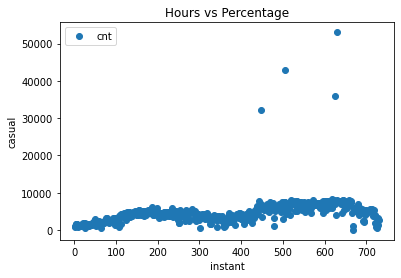

In [45]:
x_plot = 'instant'

train_contents.plot(x=x_plot, y='cnt', style='o')
plt.title('Hours vs Percentage')
plt.xlabel(x_plot)
plt.ylabel('casual')
plt.show()